**Installation package**

In [1]:
%pip install fastf1

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 148.8/148.8 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.4/61.4 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.2/168.2 kB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 46.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 5.3 MB/s eta 0:00:00


**import libraries**

In [70]:
import fastf1 as ff1
from fastf1 import plotting
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.collections import LineCollection
from matplotlib import cm
import numpy as np
import pandas as pd
import seaborn as sns

In [111]:
# Configurar gráficos
ff1.plotting.setup_mpl()

# Ignoramos los Warning
pd.options.mode.chained_assignment = None

/usr/local/lib/python3.10/dist-packages/fastf1/plotting/_plotting.py:90: FutureWarning: FastF1 will no longer silently modify the default Matplotlib colors in the future.
To remove this warning, explicitly set `color_scheme=None` or `color_scheme='fastf1'` when calling `.setup_mpl()`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/fastf1/plotting/_plotting.py:98: FutureWarning: FastF1 will stop modifying the default Matplotlib settings in the future.
To opt-in to the new behaviour and remove this warning, explicitly set `misc_mpl_mods=False` when calling `.setup_mpl()`.
  warnings.warn(


**Import session**

*   R data from race
*   Q data from qualifying

In [152]:
year = 2024
location = 'Abu Dhabi'
race = ff1.get_session(year, location, 'R')
quali = ff1.get_session(year, location, 'Q')


load data from sessions

In [153]:
race.load()
quali.load()

core           INFO 	Loading data for Abu Dhabi Grand Prix - Race [v3.4.4]
INFO:fastf1.fastf1.core:Loading data for Abu Dhabi Grand Prix - Race [v3.4.4]
req            INFO 	Using cached data for session_info
INFO:fastf1.fastf1.req:Using cached data for session_info
req            INFO 	Using cached data for driver_info
INFO:fastf1.fastf1.req:Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
INFO:fastf1.fastf1.req:Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
INFO:fastf1.fastf1.req:Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
INFO:fastf1.fastf1.req:Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
INFO:fastf1.fastf1.req:Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
INFO:fastf1.fastf1.req:Using cached data for timing_app_data
core     

In [154]:
tlaps=race.total_laps
tlaps

58

Information of event

In [155]:
race.event

,24
RoundNumber,24
Country,United Arab Emirates
Location,Yas Island
OfficialEventName,FORMULA 1 ETIHAD AIRWAYS ABU DHABI GRAND PRIX ...
EventDate,2024-12-08 00:00:00
EventName,Abu Dhabi Grand Prix
EventFormat,conventional
Session1,Practice 1
Session1Date,2024-12-06 13:30:00+04:00
Session1DateUtc,2024-12-06 09:30:00


# **Quallifying**

In [160]:
qr = quali.results
qua = pd.DataFrame(qr)
dfq = qua[['BroadcastName','Abbreviation','TeamName','Position','Q1','Q2','Q3']]
dfq

,BroadcastName,Abbreviation,TeamName,Position,Q1,Q2,Q3
4,L NORRIS,NOR,McLaren,1.0,0 days 00:01:23.682000,0 days 00:01:23.098000,0 days 00:01:22.595000
81,O PIASTRI,PIA,McLaren,2.0,0 days 00:01:23.640000,0 days 00:01:23.199000,0 days 00:01:22.804000
55,C SAINZ,SAI,Ferrari,3.0,0 days 00:01:23.487000,0 days 00:01:22.985000,0 days 00:01:22.824000
27,N HULKENBERG,HUL,Haas F1 Team,4.0,0 days 00:01:23.722000,0 days 00:01:23.040000,0 days 00:01:22.886000
1,M VERSTAPPEN,VER,Red Bull Racing,5.0,0 days 00:01:23.516000,0 days 00:01:22.998000,0 days 00:01:22.945000
10,P GASLY,GAS,Alpine,6.0,0 days 00:01:23.548000,0 days 00:01:23.086000,0 days 00:01:22.984000
63,G RUSSELL,RUS,Mercedes,7.0,0 days 00:01:23.678000,0 days 00:01:23.283000,0 days 00:01:23.132000
14,F ALONSO,ALO,Aston Martin,8.0,0 days 00:01:23.794000,0 days 00:01:23.268000,0 days 00:01:23.196000
77,V BOTTAS,BOT,Kick Sauber,9.0,0 days 00:01:23.481000,0 days 00:01:23.341000,0 days 00:01:23.204000
11,S PEREZ,PER,Red Bull Racing,10.0,0 days 00:01:23.559000,0 days 00:01:23.379000,0 days 00:01:23.264000


# **Race**

In [161]:
race_res = race.results
rac = pd.DataFrame(race.results)
dfr = rac[['BroadcastName','Abbreviation', 'TeamName','GridPosition','Position','Status','Time','Points',]]
dfr

,BroadcastName,Abbreviation,TeamName,GridPosition,Position,Status,Time,Points
4,L NORRIS,NOR,McLaren,1.0,1.0,Finished,0 days 01:26:33.291000,25.0
55,C SAINZ,SAI,Ferrari,3.0,2.0,Finished,0 days 00:00:05.832000,18.0
16,C LECLERC,LEC,Ferrari,19.0,3.0,Finished,0 days 00:00:31.928000,15.0
44,L HAMILTON,HAM,Mercedes,16.0,4.0,Finished,0 days 00:00:36.483000,12.0
63,G RUSSELL,RUS,Mercedes,6.0,5.0,Finished,0 days 00:00:37.538000,10.0
1,M VERSTAPPEN,VER,Red Bull Racing,4.0,6.0,Finished,0 days 00:00:49.847000,8.0
10,P GASLY,GAS,Alpine,5.0,7.0,Finished,0 days 00:01:12.560000,6.0
27,N HULKENBERG,HUL,Haas F1 Team,7.0,8.0,Finished,0 days 00:01:15.554000,4.0
14,F ALONSO,ALO,Aston Martin,8.0,9.0,Finished,0 days 00:01:22.373000,2.0
81,O PIASTRI,PIA,McLaren,2.0,10.0,Finished,0 days 00:01:23.821000,1.0


# Fastest **lap**

In [162]:
fastest_lap = race.laps.pick_fastest()
print(f'Lap Time: ',fastest_lap['LapTime'])
print(f'Compound ',fastest_lap['Compound'])
print(f'Lap Number: ',fastest_lap['LapNumber'])
print(f'Fresh Tyre: ',fastest_lap['FreshTyre'])
print(f'Laps Tyre: ',fastest_lap['TyreLife'])
print(f'Driver: ',fastest_lap['Driver'])

Lap Time:  0 days 00:01:25.637000
Compound  SOFT
Lap Number:  57.0
Fresh Tyre:  False
Laps Tyre:  5.0
Driver:  MAG


# Change position during the **race**

/usr/local/lib/python3.10/dist-packages/fastf1/core.py:3022: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"
/usr/local/lib/python3.10/dist-packages/fastf1/plotting/_plotting.py:151: FutureWarning: The function `driver_color` is deprecated and will be removed in a future version. Use `fastf1.plotting.get_driver_color` instead.
  warnings.warn("The function `driver_color` is deprecated and will be "


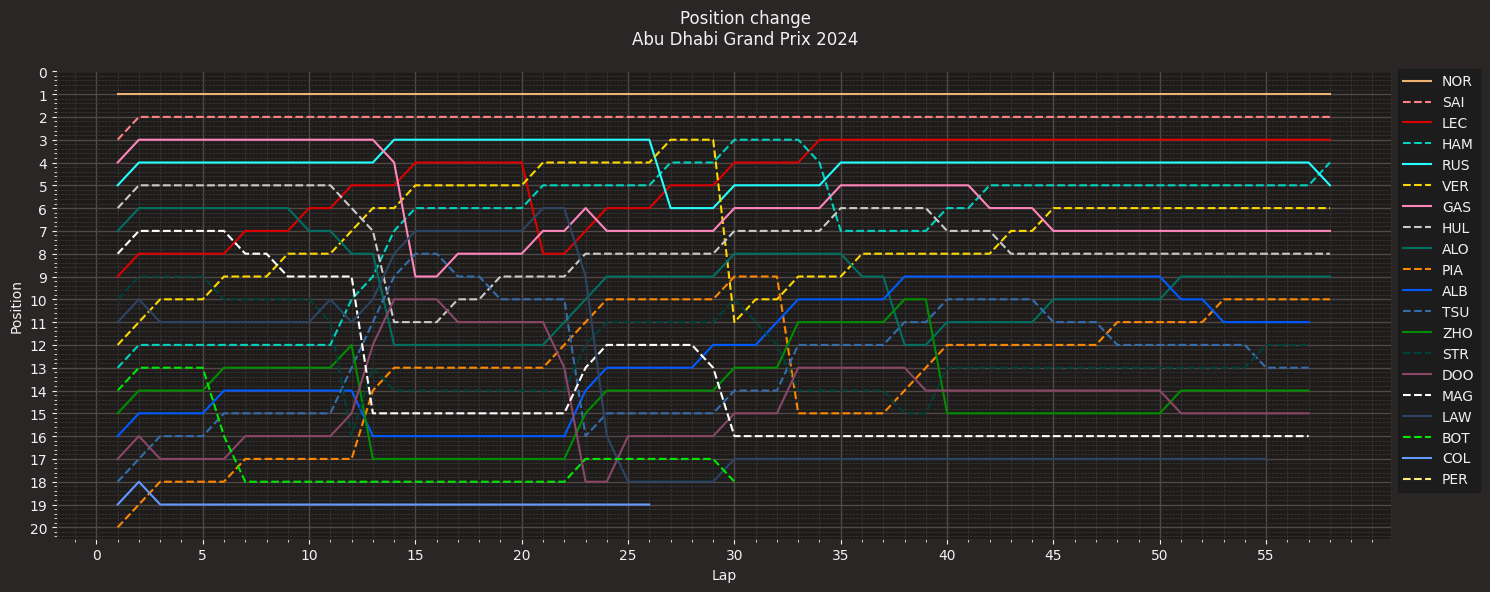

In [190]:
fig, ax = plt.subplots(figsize=(15, 6))

line_styles = ['-', '--']  # Estilos de línea para alternar
#'-', '--', '-.', ':', 'None', ' ', '','solid', 'dashed', 'dashdot', 'dotted'
style_index = 0  # Índice para seleccionar el estilo de línea

for drv in race.drivers:
    drv_laps = race.laps.pick_driver(drv)

    abb = drv_laps['Driver'].iloc[0]
    color = ff1.plotting.driver_color(abb)

    ax.plot(drv_laps['LapNumber'], drv_laps['Position'],
            label=abb, color=color,  linestyle=line_styles[style_index])

    style_index = (style_index + 1) % len(line_styles)  # Alternar estilo de línea
stop=race.total_laps
ax.set_ylim([20.5, 0.5])
#ax.set_xlim([0, 58])
ax.set_yticks(range(0, 21, 1))
ax.set_xticks(range(0, stop, 5))
ax.set_xlabel('Lap')
ax.set_ylabel('Position')

tittle=plt.suptitle(
    f"Position change\n"
    f"{race.event['EventName']} {race.event.year}"
)

ax.legend(bbox_to_anchor=(1.0, 1.02))
plt.tight_layout()

plt.show()

# track map with numberes **corners**

In [163]:
pos = fastest_lap.get_pos_data()
circuit_info = race.get_circuit_info()

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


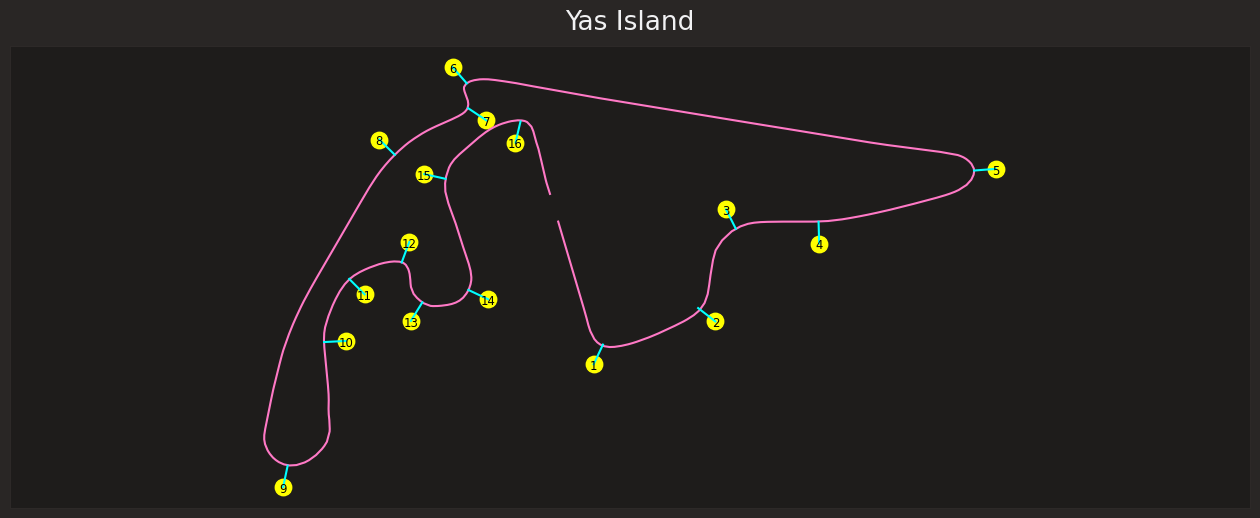

In [189]:


def rotate(xy, *, angle):
    rot_mat = np.array([[np.cos(angle), np.sin(angle)],
                        [-np.sin(angle), np.cos(angle)]])
    return np.matmul(xy, rot_mat)

    # Get an array of shape [n, 2] where n is the number of points and the second
# axis is x and y.
track = pos.loc[:, ('X', 'Y')].to_numpy()

# Convert the rotation angle from degrees to radian.
track_angle = circuit_info.rotation / 180 * np.pi

# Rotate and plot the track map.
rotated_track = rotate(track, angle=track_angle)
plt.plot(rotated_track[:, 0], rotated_track[:, 1])

offset_vector = [500, 0]  # offset length is chosen arbitrarily to 'look good'

# Iterate over all corners.
for _, corner in circuit_info.corners.iterrows():
    # Create a string from corner number and letter
    txt = f"{corner['Number']}{corner['Letter']}"

    # Convert the angle from degrees to radian.
    offset_angle = corner['Angle'] / 180 * np.pi

    # Rotate the offset vector so that it points sideways from the track.
    offset_x, offset_y = rotate(offset_vector, angle=offset_angle)

    # Add the offset to the position of the corner
    text_x = corner['X'] + offset_x
    text_y = corner['Y'] + offset_y

    # Rotate the text position equivalently to the rest of the track map
    text_x, text_y = rotate([text_x, text_y], angle=track_angle)

    # Rotate the center of the corner equivalently to the rest of the track map
    track_x, track_y = rotate([corner['X'], corner['Y']], angle=track_angle)

    # Draw a circle next to the track.
    plt.scatter(text_x, text_y, color='yellow', s=140)

    # Draw a line from the track to this circle.
    plt.plot([track_x, text_x], [track_y, text_y], color='cyan')

    # Finally, print the corner number inside the circle.
    plt.text(text_x, text_y, txt,
             va='center_baseline', ha='center', size='small', color='black')

    plt.title(race.event['Location'])
plt.xticks([])
plt.yticks([])
plt.axis('equal')
plt.show()

In [140]:
drv_laps.columns

Index(['Time', 'Driver', 'DriverNumber', 'LapTime', 'LapNumber', 'Stint',
       'PitOutTime', 'PitInTime', 'Sector1Time', 'Sector2Time', 'Sector3Time',
       'Sector1SessionTime', 'Sector2SessionTime', 'Sector3SessionTime',
       'SpeedI1', 'SpeedI2', 'SpeedFL', 'SpeedST', 'IsPersonalBest',
       'Compound', 'TyreLife', 'FreshTyre', 'Team', 'LapStartTime',
       'LapStartDate', 'TrackStatus', 'Position', 'Deleted', 'DeletedReason',
       'FastF1Generated', 'IsAccurate'],
      dtype='object')

# Gear shift **Visualization**

In [170]:
race_tel=fastest_lap.get_telemetry()

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


In [171]:
race_tel

,Date,SessionTime,DriverAhead,DistanceToDriverAhead,Time,RPM,Speed,nGear,Throttle,Brake,DRS,Source,Distance,RelativeDistance,Status,X,Y,Z
2,2024-12-08 14:30:00.599,0 days 02:23:13.382000,,382.420833,0 days 00:00:00,11447,247,5,100,False,0,interpolation,1.784145,0.000340,OnTrack,694.369535,2093.843662,-239.222115
3,2024-12-08 14:30:01.487,0 days 02:23:14.270000,,382.420833,0 days 00:00:00.888000,11619,254,6,100,False,0,car,64.542222,0.012285,OnTrack,1317.641956,2166.877233,-239.063411
4,2024-12-08 14:30:01.536,0 days 02:23:14.319000,,382.420833,0 days 00:00:00.937000,11708,255,6,100,False,0,pos,68.025151,0.012948,OnTrack,1336.000000,2169.000000,-239.000000
5,2024-12-08 14:30:01.767,0 days 02:23:14.550000,27,382.420833,0 days 00:00:01.168000,11797,257,6,100,False,0,car,84.531111,0.016089,OnTrack,1417.402149,2178.305908,-238.823601
6,2024-12-08 14:30:01.816,0 days 02:23:14.599000,27,380.228241,0 days 00:00:01.217000,11805,259,6,100,False,0,pos,88.073933,0.016763,OnTrack,1450.000000,2182.000000,-239.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
646,2024-12-08 14:31:25.687,0 days 02:24:38.470000,81,4883.471944,0 days 00:01:25.088000,11518,220,5,100,False,0,car,5215.770278,0.992740,OnTrack,349.394682,2054.224968,-238.048925
647,2024-12-08 14:31:25.936,0 days 02:24:38.719000,81,4884.833056,0 days 00:01:25.337000,11722,221,5,100,False,0,pos,5231.162864,0.995670,OnTrack,414.000000,2060.000000,-239.000000
648,2024-12-08 14:31:25.967,0 days 02:24:38.750000,81,4886.194167,0 days 00:01:25.368000,11926,223,5,100,False,0,car,5233.114722,0.996041,OnTrack,434.087170,2062.538139,-239.051448
649,2024-12-08 14:31:26.216,0 days 02:24:38.999000,81,4886.194167,0 days 00:01:25.617000,11145,228,5,99,False,0,pos,5249.197121,0.999102,OnTrack,678.000000,2094.000000,-239.000000


<ipython-input-185-669da9e02498>:27: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('Dark2')


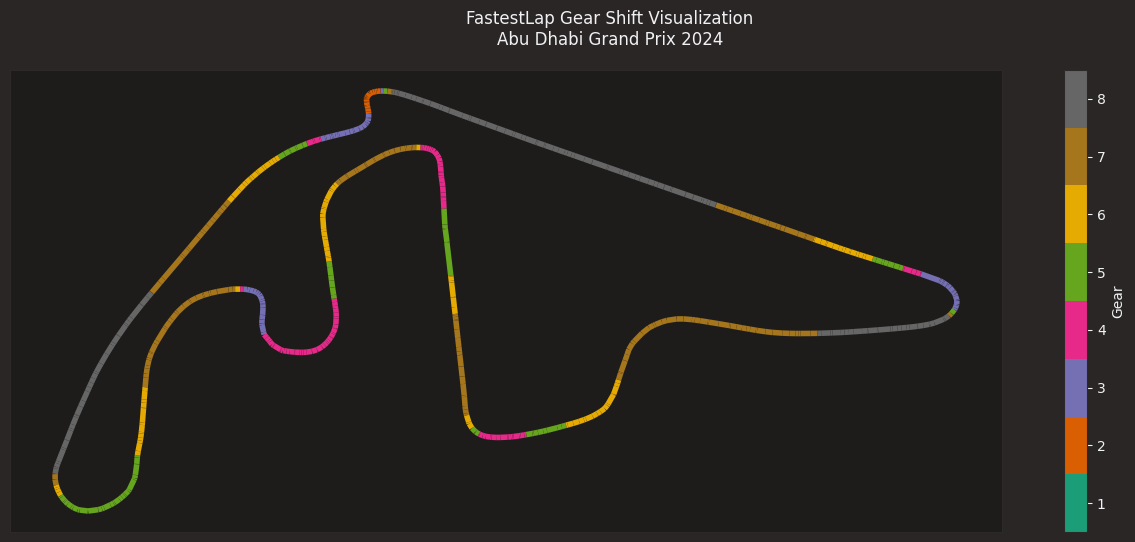

In [185]:
# Rotación
angle_deg = 270  # Cambia este valor al ángulo deseado en grados
angle_rad = np.radians(angle_deg)  # Convierte a radianes

# Matriz de rotación
rotation_matrix = np.array([
    [np.cos(angle_rad), -np.sin(angle_rad)],
    [np.sin(angle_rad),  np.cos(angle_rad)]
])

# Coordenadas originales
x = np.array(race_tel['X'].values)
y = np.array(race_tel['Y'].values)

# Aplica la rotación
rotated_coords = np.dot(rotation_matrix, np.array([x, y]))
x_rotated, y_rotated = rotated_coords[0], rotated_coords[1]

# Recalcula segmentos para la gráfica
points = np.array([x_rotated, y_rotated]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
gear = race_tel['nGear'].to_numpy().astype(float)

# Configuración de la gráfica
cmap = cm.get_cmap('Dark2')
lc_comp = LineCollection(segments, norm=plt.Normalize(1, cmap.N + 1), cmap=cmap)
lc_comp.set_array(gear)
lc_comp.set_linewidth(4)

plt.rcParams['figure.figsize'] = [16, 6]

# Crear la gráfica
plt.gca().add_collection(lc_comp)
plt.axis('equal')
plt.tick_params(labelleft=False, left=False, labelbottom=False, bottom=False)
title = plt.suptitle(
    f"FastestLap Gear Shift Visualization\n"
    f"{race.event['EventName']} {race.event.year}"
)

# Agregar barra de color
cbar = plt.colorbar(mappable=lc_comp, label="Gear", boundaries=np.arange(1, 10))
cbar.set_ticks(np.arange(1.5, 9.5))
cbar.set_ticklabels(np.arange(1, 9))

plt.show()


/usr/local/lib/python3.10/dist-packages/fastf1/core.py:3022: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"
/usr/local/lib/python3.10/dist-packages/fastf1/core.py:3022: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"
/usr/local/lib/python3.10/dist-packages/fastf1/utils.py:89: FutureWarning: `utils.delta_time` is considered deprecated and willbe modified or removed in a future release because it hasa tendency to give inaccurate results.
  warnings.warn("`utils.delta_time` is considered deprecated and will"
/usr/local/lib/python3.10/dist-packages/fastf1/plotting/_plotting.py:242: FutureWarning: The function `team_color` is deprecated and will be removed in a future version. Use `fastf1.plotting.get_team_color` instead.
  warnings.warn("The f

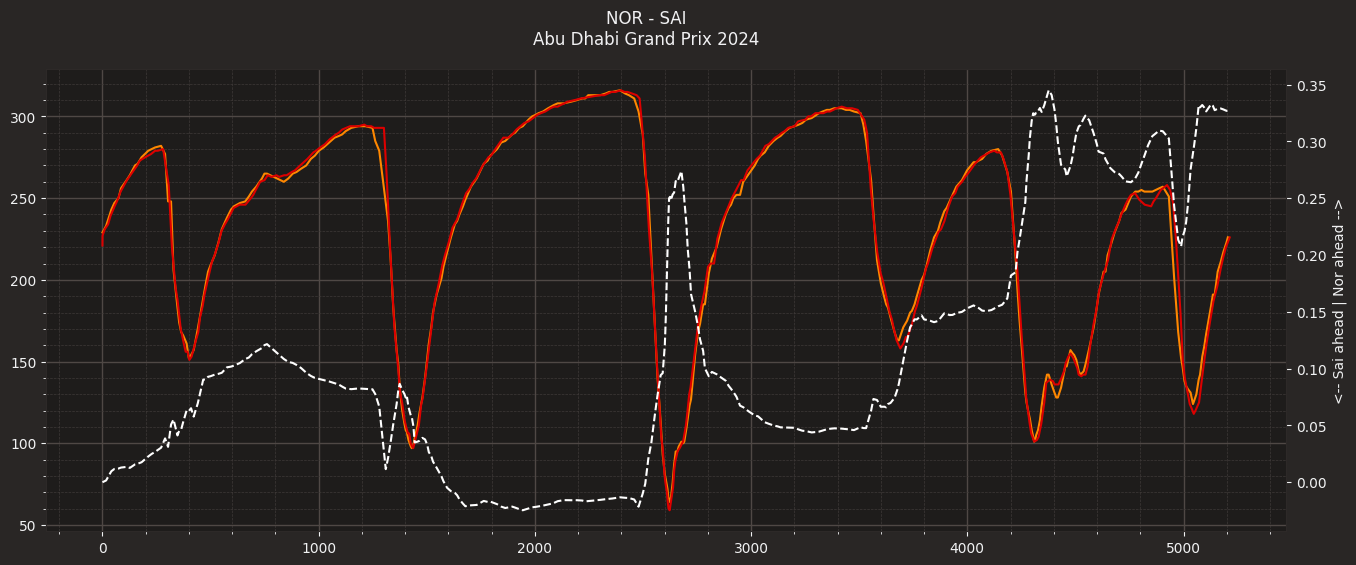

In [195]:
from fastf1 import utils

nor = race.laps.pick_driver('NOR').pick_fastest()
sai = race.laps.pick_driver('SAI').pick_fastest()

delta_time, ref_tel, compare_tel = utils.delta_time(nor, sai)
# nor is reference, lec is compared

fig, ax = plt.subplots()
# use telemetry returned by .delta_time for best accuracy,
# this ensure the same applied interpolation and resampling
ax.plot(ref_tel['Distance'], ref_tel['Speed'],
        color=plotting.team_color(nor['Team']))
ax.plot(compare_tel['Distance'], compare_tel['Speed'],
        color=plotting.team_color(sai['Team']))

tittle=plt.suptitle(
    f"NOR - SAI\n"
    f"{race.event['EventName']} {race.event.year}")

twin = ax.twinx()
twin.plot(ref_tel['Distance'], delta_time, '--', color='white')
twin.set_ylabel("<-- Sai ahead | Nor ahead -->")
plt.show()